# Chapter 17. Dose-response meta-analysis

Nicola Orsini <sup>1</sup>, Susanna C. Larsson <sup>2</sup>, Georgia Salanti <sup>3</sup>

1 Associate Professor of Medical Statistics, Department of Public Health Sciences, Karolinska Institutet, Stockholm, Sweden

2 Associate Professor of Epidemiology, Institute of Environmental Medicine, Karolinska Institutet, Stockholm, Sweden

3 Associate Professor of Biostatistics and Epidemiology, Institute of Social and Preventive Medicine, Bern, Switzerland 


<b>Abstract</b>

Characterising the change in the risk of a health-related outcome according to the levels of an exposure is increasingly popular in systematic reviews. This chapter provides an introduction to the statistical methods currently used to perform linear and non-linear dose-response analysis based on aggregated data from multiple studies. We explain how dose-response associations are estimated within a study and summarised across studies. The re-analysis of observational studies about coffee consumption and mortality is used to illustrate how to move beyond a linear dose-response trend and the complexity of making inference on relative risks when using restricted cubic splines. 


In [40]:
use http://www.stats4life.se/data/coffee_mortality.dta, clear

(Coffee and mortality risk (Crippa et al AJE, 2014))


In [41]:
describe


Contains data from http://www.stats4life.se/data/coffee_mortality.dta
  obs:           101                          Coffee and mortality risk
                                                (Crippa et al AJE, 2014)
 vars:            14                          25 Apr 2019 15:40
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              byte    %12.0g                ID set of estimates
author          byte    %12.0g     author     First author of the paper
year            int     %12.0g                Publication year
dose            double  %10.0g                Coffee intake (cups/day)
cases           int     %12.0g                Nr. cases
n               long    %12.0g                Total number persons/person-time
type            byte    %12.0g     type       Typ

# Analysis of a single study

In [42]:
// Empirical data from Klatsky et al. 

list id author dose case n rr lb ub if id == 3 , clean



       id         author   dose   cases       n     rr     lb     ub  
 11.    3   Klatsky et a      0     832   34755   1.00   1.00   1.00  
 12.    3   Klatsky et a     .5     564   18106   0.96   0.86   1.08  
 13.    3   Klatsky et a      2    2081   53596   0.94   0.86   1.02  
 14.    3   Klatsky et a      5     658   15541   0.93   0.83   1.04  
 15.    3   Klatsky et a      8     274    5522   0.88   0.76   1.02  


## Linear function 

In [43]:
drmeta logrr dose if id == 3, se(se)  data(n case)  id(id) type(type) 



One-stage fixed-effects dose-response model      Number of studies =         1
Optimization   = gls                                 Number of obs =         4
           AIC = -13.21                              Model chi2(1) =      3.49
Log likelihood = 7.6069478                             Prob > chi2 =    0.0616
------------------------------------------------------------------------------
       logrr |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        dose |  -.0142822   .0076413    -1.87   0.062    -.0292589    .0006946
------------------------------------------------------------------------------


In [44]:
lincom dose, cformat(%4.3f) eform


 ( 1)  dose = 0

------------------------------------------------------------------------------
       logrr |     exp(b)   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         (1) |      0.986      0.008    -1.87   0.062        0.971       1.001
------------------------------------------------------------------------------


In [45]:
drmeta_graph, dose(0(1)8) ref(0) eq(d) eform list


    _x   _t1    _xb    _lb    _ub  
     0     0   1.00   1.00   1.00  
     1     1   0.99   0.97   1.00  
     2     2   0.97   0.94   1.00  
     3     3   0.96   0.92   1.00  
     4     4   0.94   0.89   1.00  
     5     5   0.93   0.86   1.00  
     6     6   0.92   0.84   1.00  
     7     7   0.90   0.81   1.00  
     8     8   0.89   0.79   1.01  


In [46]:
drmeta_graph, dose(0(.5)8)  ref(0) eq(d)eform ///
ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") scheme(s1mono) name(f_l, replace)

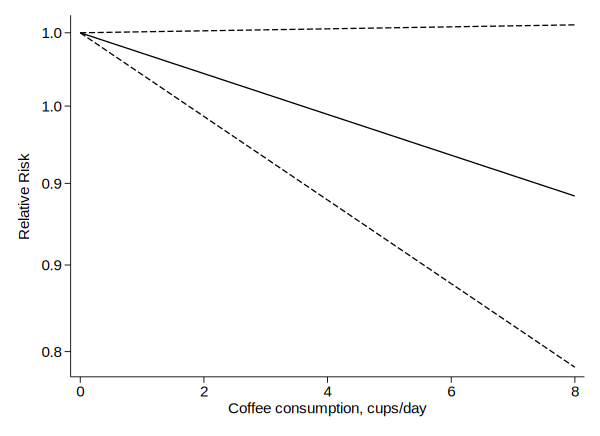

In [47]:
graph display

### Customize the graph for a single study

In [48]:
predictnl logrr_l = _b[dose]*(dose-0) , ci(lo_l hi_l)

gen rr_l = exp(logrr_l)
gen lb_l = exp(lo_l)
gen ub_l = exp(hi_l)


note: confidence intervals calculated using Z critical values





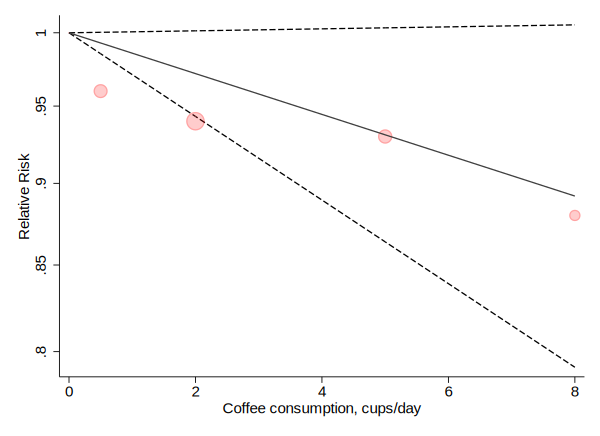

In [49]:
twoway (line lb_l ub_l dose, sort lp(- -) lc(black black)) ///
    (scatter rr dose [aw=1/se^2], mc(red%20) ms(O)) ///
    (line rr_l dose, sort) ///
    if id == 3 ///
     , yscale(log) scheme(s1mono) ///
       legend(off) plotregion(style(none)) ///
        ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") name(f_l, replace)

<b>Figure 1</b> Dose-response association between coffee consumption and mortality risk estimated for the study Klasky et al. empirical data (red circles) were fitted using a linear (solid) function in an inverse variance/covariance weighted linear regression model. No coffee consumption (0 cups/day) served as referent

## Quadratic function 

In [50]:
gen dosesq = dose^2

In [51]:
drmeta logrr dose  dosesq if id == 3, se(se)  data(n case)  id(id) type(type) 



One-stage fixed-effects dose-response model      Number of studies =         1
Optimization   = gls                                 Number of obs =         4
           AIC = -11.39                              Model chi2(2) =      3.67
Log likelihood = 7.6959197                             Prob > chi2 =    0.1595
------------------------------------------------------------------------------
       logrr |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        dose |  -.0236502   .0234857    -1.01   0.314    -.0696814     .022381
      dosesq |   .0013583     .00322     0.42   0.673    -.0049527    .0076693
------------------------------------------------------------------------------


In [52]:
drmeta_graph, dose(0(.5)8)  ref(0) eq(d d^2) addplot(-.0142822*(d-0)) list eform ///
ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") scheme(s1mono) name(f_q, replace)


     _x   _t1     _t2    _xb    _lb    _ub  
      0     0       0   1.00   1.00   1.00  
     .5    .5     .25   0.99   0.97   1.01  
      1     1       1   0.98   0.94   1.02  
    1.5   1.5    2.25   0.97   0.92   1.02  
      2     2       4   0.96   0.90   1.03  
    2.5   2.5    6.25   0.95   0.88   1.03  
      3     3       9   0.94   0.86   1.03  
    3.5   3.5   12.25   0.94   0.85   1.03  
      4     4      16   0.93   0.85   1.02  
    4.5   4.5   20.25   0.92   0.84   1.02  
      5     5      25   0.92   0.84   1.01  
    5.5   5.5   30.25   0.91   0.83   1.01  
      6     6      36   0.91   0.83   1.00  
    6.5   6.5   42.25   0.91   0.82   1.00  
      7     7      49   0.91   0.82   1.01  
    7.5   7.5   56.25   0.90   0.81   1.02  
      8     8      64   0.90   0.79   1.03  


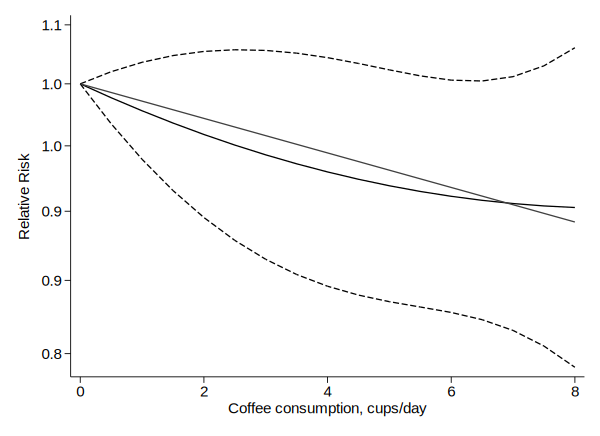

In [53]:
graph display

In [54]:
predictnl logrr_q = _b[dose]*(dose-0) + _b[dosesq]*(dosesq-0), ci(lo_q hi_q)
gen rr_q = exp(logrr_q)
gen lb_q = exp(lo_q)
gen ub_q = exp(hi_q)


note: confidence intervals calculated using Z critical values





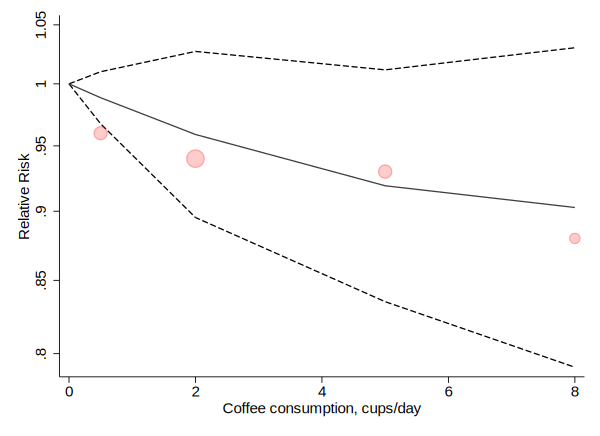

In [55]:
twoway (line lb_q ub_q dose, sort lp(- -) lc(black black)) ///
    (scatter rr dose [aw=1/se^2], mc(red%20) ms(O)) ///
    (line rr_q dose, sort) ///
    if id == 3 ///
     , yscale(log) scheme(s1mono) ///
       legend(off) plotregion(style(none)) ///
        ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") name(f_q, replace)

## Restricted cubic spline function 

In [56]:
* Restricted cubic spline function

mkspline doses = dose, knots(0.495 2.000 4.500) cubic displayknots
mat knots = r(knots)



             |     knot1      knot2      knot3 
-------------+---------------------------------
        dose |      .495          2        4.5 



In [57]:
drmeta logrr doses1 doses2 if id == 3, se(se)  data(n case)  id(id) type(type) 



One-stage fixed-effects dose-response model      Number of studies =         1
Optimization   = gls                                 Number of obs =         4
           AIC = -11.59                              Model chi2(2) =      3.87
Log likelihood = 7.7943067                             Prob > chi2 =    0.1446
------------------------------------------------------------------------------
       logrr |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      doses1 |   -.027719   .0232426    -1.19   0.233    -.0732736    .0178356
      doses2 |   .0184149   .0300827     0.61   0.540    -.0405462     .077376
------------------------------------------------------------------------------


In [58]:
drmeta_graph, dose(0(.5)8) ref(0) matknots(knots) list eform ///
         yscale(log) scheme(s1mono) ///
         ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") 


     _x   _t1        _t2    _xb    _lb    _ub  
      0     0          0   1.00   1.00   1.00  
     .5    .5   7.79e-09   0.99   0.96   1.01  
      1     1   .0080291   0.97   0.93   1.02  
    1.5   1.5   .0632839   0.96   0.90   1.02  
      2     2   .2125223   0.95   0.88   1.03  
    2.5   2.5    .490018   0.94   0.86   1.03  
      3     3   .8801071   0.94   0.86   1.02  
    3.5   3.5   1.354641   0.93   0.85   1.02  
      4     4   1.885472   0.93   0.85   1.01  
    4.5   4.5   2.444451   0.92   0.85   1.00  
      5     5   3.008121   0.92   0.85   1.00  
    5.5   5.5   3.571792   0.92   0.84   1.00  
      6     6   4.135463   0.91   0.83   1.00  
    6.5   6.5   4.699133   0.91   0.83   1.00  
      7     7   5.262804   0.91   0.82   1.01  
    7.5   7.5   5.826474   0.90   0.81   1.01  
      8     8   6.390145   0.90   0.80   1.02  


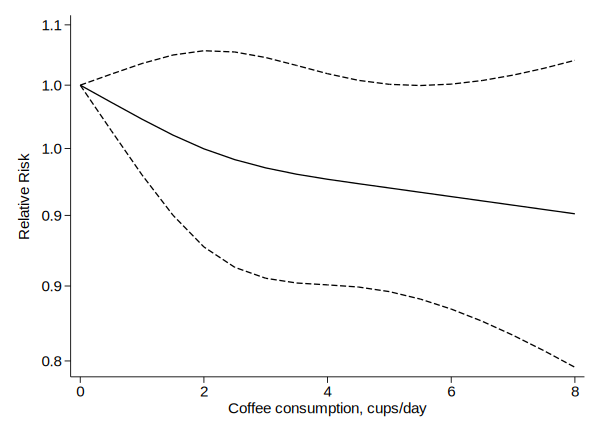

In [59]:
graph display

In [60]:
predictnl logrr_s = _b[doses1]*(doses1-0) + _b[doses2]*(doses2-0), ci(lo_s hi_s)
gen rr_s = exp(logrr_s)
gen lb_s = exp(lo_s)
gen ub_s = exp(hi_s)


note: confidence intervals calculated using Z critical values





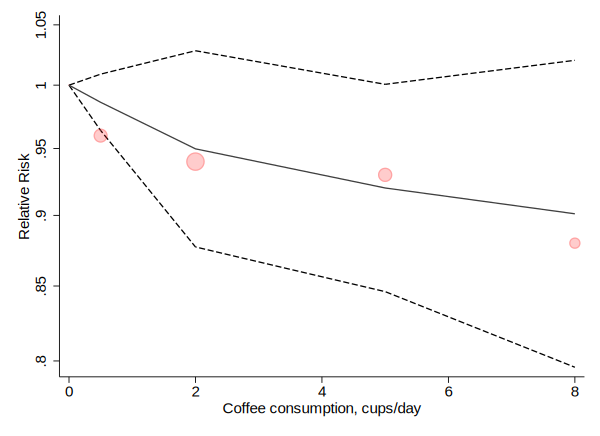

In [61]:
twoway (line lb_s ub_s dose, sort lp(- -) lc(black black)) ///
    (scatter rr dose [aw=1/se^2], mc(red%20) ms(O)) ///
    (line rr_s dose, sort) ///
    if id == 3 ///
     , yscale(log) scheme(s1mono) ///
       legend(off) plotregion(style(none)) ///
        ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") name(f_s, replace)

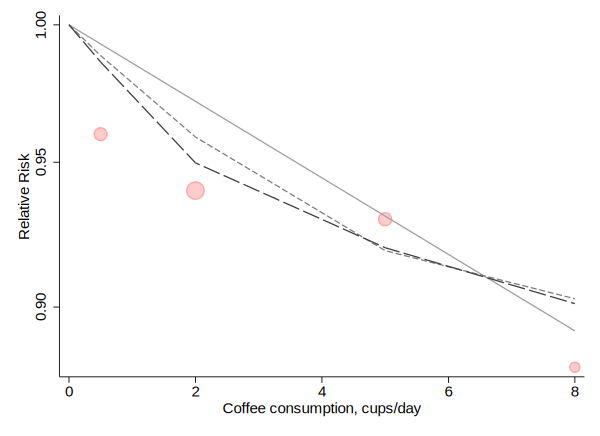

In [62]:
twoway  (scatter rr dose [aw=1/se^2], mc(red%20) ms(O)) ///
    (line rr_l dose, sort lp(l)) ///
    (line rr_q dose, sort lp(-)) ///
    (line rr_s dose, sort lp(longdash)) ///
    if id == 3 ///
     , yscale(log) scheme(s1mono) ///
       legend(off) plotregion(style(none)) ///
        ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") name(f_all, replace)

# Analysis of multiple studies

## Two-stage random-effects dose-response model using a linear function

In [76]:
drmeta logrr dose , se(se)  data(n case)  id(id) type(type) 2stage reml



Two-stage random-effects dose-response model     Number of studies =        22
Optimization   = reml                                Number of obs =        79
           AIC = -68.06                              Model chi2(1) =     40.09
Log likelihood = 36.032066                             Prob > chi2 =    0.0000
------------------------------------------------------------------------------
       logrr |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        dose |  -.0326542   .0051571    -6.33   0.000    -.0427619   -.0225466
------------------------------------------------------------------------------
---------------------------------------------
  Random-effects parameters  |   Estimate
-----------------------------+---------------
var(dose,dose)               |     .000295
---------------------------------------------
LR test vs. no random-effects model = 19.211158       Prob >= ch

In [77]:
drmeta_graph, dose(0(.5)8)  ref(0) eq(d)  list eform ///
    ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") ///
        ylabel(.8 .85 .9 .95 1, angle(horiz) format(%3.2f)) ///
    scheme(s1mono) xlabel(0/8) name(f_all_l, replace)


     _x   _t1    _xb    _lb    _ub  
      0     0   1.00   1.00   1.00  
     .5    .5   0.98   0.98   0.99  
      1     1   0.97   0.96   0.98  
    1.5   1.5   0.95   0.94   0.97  
      2     2   0.94   0.92   0.96  
    2.5   2.5   0.92   0.90   0.95  
      3     3   0.91   0.88   0.93  
    3.5   3.5   0.89   0.86   0.92  
      4     4   0.88   0.84   0.91  
    4.5   4.5   0.86   0.82   0.90  
      5     5   0.85   0.81   0.89  
    5.5   5.5   0.84   0.79   0.88  
      6     6   0.82   0.77   0.87  
    6.5   6.5   0.81   0.76   0.86  
      7     7   0.80   0.74   0.85  
    7.5   7.5   0.78   0.73   0.84  
      8     8   0.77   0.71   0.83  


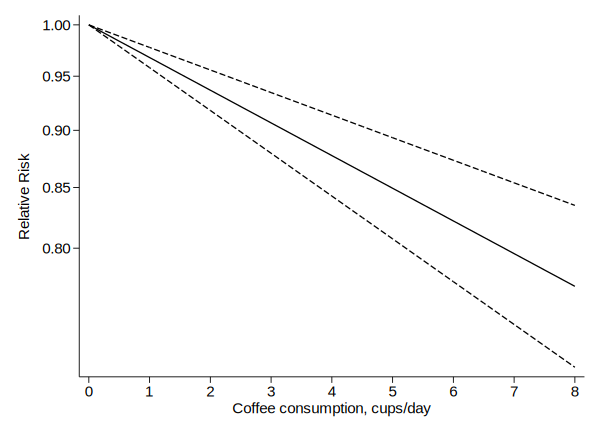

In [78]:
graph display

## Two-stage random-effects dose-response model using a spline function

In [66]:
drmeta logrr doses1 doses2 , se(se)  data(n case)  id(id) type(type) 2stage reml



Two-stage random-effects dose-response model     Number of studies =        22
Optimization   = reml                                Number of obs =        79
           AIC = -96.90                              Model chi2(2) =     58.75
Log likelihood = 53.451242                             Prob > chi2 =    0.0000
------------------------------------------------------------------------------
       logrr |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      doses1 |  -.0837799   .0116223    -7.21   0.000    -.1065593   -.0610006
      doses2 |   .0765633   .0124865     6.13   0.000     .0520902    .1010364
------------------------------------------------------------------------------
---------------------------------------------
  Random-effects parameters  |   Estimate
-----------------------------+---------------
var(doses1,doses1)           |    .0009563
var(doses2,doses2)           | 

In [67]:
drmeta_graph, dose(0(.1)8) ref(0) matknots(knots)  eform ///
         yscale(log) scheme(s1mono)  xlabel(0/8) ///
        ylabel(.8 .85 .9 .95 1, angle(horiz) format(%3.2f)) ///
        ytitle("Relative Risk") xtitle("Coffee consumption, cups/day") name(f_all_s, replace)

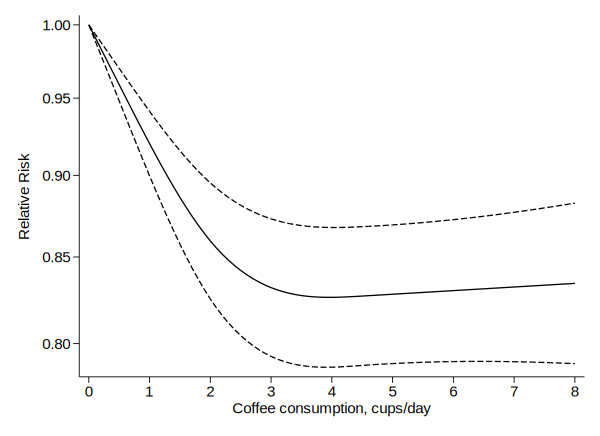

In [68]:
graph display

<b>Figure 3</b> Average dose-response association between coffee consumption and all-cause mortality in a dose-response meta-analysis of prospective cohort studies (Crippa et al, AJE, 2014). Coffee consumption was modelled with restricted cubic splines in a two-stage random-effects dose-response model. Dashed lines represent the 95% confidence intervals for the dose-response association (solid line). No coffee consumption (0 cups/day) served as the reference group.

## Forrest plot of estimated linear trends

In [69]:
quietly gen est_beta = .
quietly gen se_est_beta = .

In [70]:
quietly levelsof id , local(ids)
quietly foreach s of local ids {
    drmeta logrr dose if id == `s', se(se)  data(n case)  id(id) type(type)
    replace est_beta = _b[dose] if id == `s'
    replace se_est_beta = _se[dose] if id == `s'
}

In [71]:
bysort id: gen tag_study = (se == 0)

In [72]:
meta set est_beta se_est_beta if tag_study == 1, studylabel(author) eslabel(" ")

(79 missing values generated)

Meta-analysis setting information

 Study information
    No. of studies:  22
       Study label:  author
        Study size:  N/A

       Effect size
              Type:  Generic
             Label:  
          Variable:  est_beta

         Precision
         Std. Err.:  se_est_beta
                CI:  [_meta_cil, _meta_ciu]
          CI level:  95%

  Model and method
             Model:  Random-effects
            Method:  REML


In [73]:
meta summarize , eform


  Effect-size label:   
        Effect size:  est_beta
          Std. Err.:  se_est_beta
        Study label:  author

Meta-analysis summary                     Number of studies =     22
Random-effects model                      Heterogeneity:
Method: REML                                          tau2 =  0.0003
                                                    I2 (%) =   74.71
                                                        H2 =    3.95

--------------------------------------------------------------------
            Study |         exp( )    [95% Conf. Interval]  % Weight
------------------+-------------------------------------------------
               12 |          1.034       0.991       1.078      3.39
               15 |          0.976       0.941       1.013      3.84
               10 |          0.986       0.971       1.001      7.14
               18 |          0.953       0.907       1.000      2.77
               18 |          0.954       0.891       1.021     

In [74]:
meta forestplot author gender area _plot _esci , eform("RR per 1 cups/day")  nonotes nullrefline


  Effect-size label:   
        Effect size:  est_beta
          Std. Err.:  se_est_beta
        Study label:  author



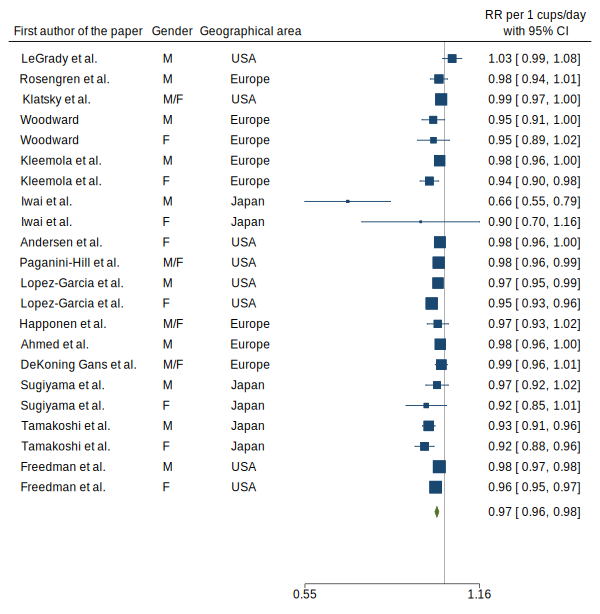

In [75]:
graph display

<b>Figure 2</b> Summary of the study-specific (log) linear trends, expressed for every 1 cups/day increment, of the association between coffee consumption and mortality risk estimated using a random-effect model. Study-specific trends were estimated using an inverse variance/covariance weighted linear regression model. 